In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('../datasets/train.csv')
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
train.shape

(2051, 81)

In [5]:
train.dtypes

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
                 ...   
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
SalePrice         int64
Length: 81, dtype: object

In [6]:
train.isnull().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    330
               ... 
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
SalePrice         0
Length: 81, dtype: int64

In [7]:
train.columns = train.columns.str.replace(' ', '_')

In [8]:
train.corr()

,Id,PID,MS_SubClass,Lot_Frontage,Lot_Area,Overall_Qual,Overall_Cond,Year_Built,Year_Remod/Add,Mas_Vnr_Area,...,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,3Ssn_Porch,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Yr_Sold,SalePrice
Id,1.000000,0.175793,0.026543,-0.024967,0.032872,-0.061483,-0.026096,-0.064444,-0.090040,-0.035493,...,-0.009045,0.001382,0.033747,-0.022791,0.009758,0.055696,-0.012683,0.127723,-0.975747,-0.051398
PID,0.175793,1.000000,-0.003632,-0.091291,0.024135,-0.265863,0.106861,-0.347039,-0.176666,-0.247959,...,-0.041221,-0.081129,0.150179,-0.024679,-0.042030,0.005825,0.004223,-0.032735,0.008476,-0.255052
MS_SubClass,0.026543,-0.003632,1.000000,-0.389790,-0.245484,0.035763,-0.070141,0.035983,0.044836,-0.004047,...,0.001622,-0.020289,-0.039842,-0.030088,-0.038819,-0.004585,-0.027485,0.013027,-0.032870,-0.087335
Lot_Frontage,-0.024967,-0.091291,-0.389790,1.000000,0.574024,0.194808,-0.054455,0.109504,0.085052,0.218218,...,0.115180,0.184958,-0.003302,0.031855,0.074819,0.156575,0.051676,-0.017389,0.009112,0.341842
Lot_Area,0.032872,0.024135,-0.245484,0.574024,1.000000,0.105824,-0.019185,0.036002,0.050771,0.169379,...,0.155623,0.140864,0.014139,0.019553,0.067714,0.115102,0.093922,0.003197,-0.029454,0.296566
Overall_Qual,-0.061483,-0.265863,0.035763,0.194808,0.105824,1.000000,-0.082770,0.602964,0.584654,0.438685,...,0.257081,0.308855,-0.154554,0.031938,0.048752,0.006558,0.022099,0.019242,-0.011578,0.800207
Overall_Cond,-0.026096,0.106861,-0.070141,-0.054455,-0.019185,-0.082770,1.000000,-0.370988,0.042614,-0.135878,...,0.011034,-0.052266,0.108320,0.026907,0.047359,-0.005806,0.014269,-0.003144,0.047664,-0.097019
Year_Built,-0.064444,-0.347039,0.035983,0.109504,0.036002,0.602964,-0.370988,1.000000,0.629116,0.329741,...,0.216339,0.207798,-0.380082,0.016104,-0.037866,0.003728,0.000626,-0.007083,-0.003559,0.571849
Year_Remod/Add,-0.090040,-0.176666,0.044836,0.085052,0.050771,0.584654,0.042614,0.629116,1.000000,0.211443,...,0.216271,0.264476,-0.237523,0.040416,-0.041211,-0.022382,-0.001704,0.011568,0.042744,0.550370
Mas_Vnr_Area,-0.035493,-0.247959,-0.004047,0.218218,0.169379,0.438685,-0.135878,0.329741,0.211443,1.000000,...,0.163584,0.163489,-0.107104,0.011161,0.086631,0.012422,0.079219,-0.001472,-0.018719,0.512230


In [9]:
pricecorr = train.corr()[['SalePrice']].sort_values('SalePrice').iloc[:-1, :]
pricecorr

,SalePrice
PID,-0.255052
Enclosed_Porch,-0.135656
Kitchen_AbvGr,-0.125444
Overall_Cond,-0.097019
MS_SubClass,-0.087335
Id,-0.051398
Bsmt_Half_Bath,-0.045328
Low_Qual_Fin_SF,-0.041594
Yr_Sold,-0.015203
Misc_Val,-0.007375


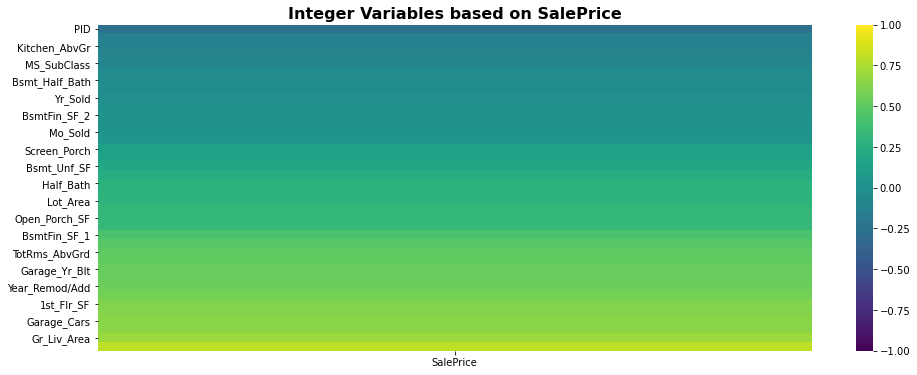

In [244]:
plt.figure(figsize=(16,6))
sns.heatmap(pricecorr, cmap = 'viridis', vmin = -1, vmax = 1)
plt.title('Integer Variables based on SalePrice', fontsize = 16, fontweight ='bold')
plt.savefig('../graphs/intcolscorr.png')

Not a very readable graph, but contains useful information regardless

In [11]:
pcsort = pricecorr.unstack().sort_values()
#https://www.geeksforgeeks.org/sort-correlation-matrix-in-python/
pcsort

SalePrice  PID               -0.255052
           Enclosed_Porch    -0.135656
           Kitchen_AbvGr     -0.125444
           Overall_Cond      -0.097019
           MS_SubClass       -0.087335
           Id                -0.051398
           Bsmt_Half_Bath    -0.045328
           Low_Qual_Fin_SF   -0.041594
           Yr_Sold           -0.015203
           Misc_Val          -0.007375
           BsmtFin_SF_2       0.016255
           Pool_Area          0.023106
           Mo_Sold            0.032735
           3Ssn_Porch         0.048732
           Screen_Porch       0.134581
           Bedroom_AbvGr      0.137067
           Bsmt_Unf_SF        0.190210
           2nd_Flr_SF         0.248452
           Half_Bath          0.283001
           Bsmt_Full_Bath     0.283662
           Lot_Area           0.296566
           Wood_Deck_SF       0.326490
           Open_Porch_SF      0.333476
           Lot_Frontage       0.341842
           BsmtFin_SF_1       0.423519
           Fireplaces    

In [12]:
pricecorr.loc[pricecorr['SalePrice'] > 0.7]

,SalePrice
Overall_Qual,0.800207


In [13]:
rest = pricecorr.loc[pricecorr['SalePrice'] < 0.3]
rest

,SalePrice
PID,-0.255052
Enclosed_Porch,-0.135656
Kitchen_AbvGr,-0.125444
Overall_Cond,-0.097019
MS_SubClass,-0.087335
Id,-0.051398
Bsmt_Half_Bath,-0.045328
Low_Qual_Fin_SF,-0.041594
Yr_Sold,-0.015203
Misc_Val,-0.007375


In [14]:
subzero = rest.loc[rest['SalePrice'] < 0]

In [15]:
notcorr = rest.loc[rest['SalePrice'] > 0]

In [16]:
subzero_unstack = subzero.unstack().sort_values()
notcorr_unstack = notcorr.unstack().sort_values()

In [17]:
subzero_keys = []
for n in subzero_unstack.items():
    subzero_keys.append(n[0][1])
print(subzero_keys)

['PID', 'Enclosed_Porch', 'Kitchen_AbvGr', 'Overall_Cond', 'MS_SubClass', 'Id', 'Bsmt_Half_Bath', 'Low_Qual_Fin_SF', 'Yr_Sold', 'Misc_Val']


In [18]:
notcorr_keys = []
for n in notcorr_unstack.items():
    notcorr_keys.append(n[0][1])
print(notcorr_keys)

['BsmtFin_SF_2', 'Pool_Area', 'Mo_Sold', '3Ssn_Porch', 'Screen_Porch', 'Bedroom_AbvGr', 'Bsmt_Unf_SF', '2nd_Flr_SF', 'Half_Bath', 'Bsmt_Full_Bath', 'Lot_Area']


In [19]:
train.corr().keys()

Index(['Id', 'PID', 'MS_SubClass', 'Lot_Frontage', 'Lot_Area', 'Overall_Qual',
       'Overall_Cond', 'Year_Built', 'Year_Remod/Add', 'Mas_Vnr_Area',
       'BsmtFin_SF_1', 'BsmtFin_SF_2', 'Bsmt_Unf_SF', 'Total_Bsmt_SF',
       '1st_Flr_SF', '2nd_Flr_SF', 'Low_Qual_Fin_SF', 'Gr_Liv_Area',
       'Bsmt_Full_Bath', 'Bsmt_Half_Bath', 'Full_Bath', 'Half_Bath',
       'Bedroom_AbvGr', 'Kitchen_AbvGr', 'TotRms_AbvGrd', 'Fireplaces',
       'Garage_Yr_Blt', 'Garage_Cars', 'Garage_Area', 'Wood_Deck_SF',
       'Open_Porch_SF', 'Enclosed_Porch', '3Ssn_Porch', 'Screen_Porch',
       'Pool_Area', 'Misc_Val', 'Mo_Sold', 'Yr_Sold', 'SalePrice'],
      dtype='object')

According to [andrews.edu](https://www.andrews.edu/~calkins/math/edrm611/edrm05.htm), we can assume that variables that fall between 0.3-0.5 are lowly correlated, variables that fall between 0.5-0.7 are moderately correlated, variables that fall between 0.7-0.9 are highly correlated, and variables that fall between 0.9-1.0 are very highly correlated. 

From this and my analyis so far, I can gather that a significant portion of my analysis we'll come from the variables that fall between 0.3 to 1.0

# CLEANING INTEGER COLUMNS
Creating a new dataset for the cleaning of integer columns

In [20]:
trainteger = train

In [21]:
trainteger.head()

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [22]:
trainnegcorrelated = trainteger[subzero_keys]
trainnegcorrelated

,PID,Enclosed_Porch,Kitchen_AbvGr,Overall_Cond,MS_SubClass,Id,Bsmt_Half_Bath,Low_Qual_Fin_SF,Yr_Sold,Misc_Val
0,533352170,0,1,8,60,109,0.0,0,2010,0
1,531379050,0,1,5,60,544,0.0,0,2009,0
2,535304180,0,1,7,20,153,0.0,0,2010,0
3,916386060,0,1,5,60,318,0.0,0,2010,0
4,906425045,0,1,8,50,255,0.0,0,2010,0
...,...,...,...,...,...,...,...,...,...,...
2046,921126030,0,1,5,20,1587,0.0,0,2008,0
2047,905377130,0,1,5,30,785,0.0,0,2009,0
2048,909253010,0,1,6,50,916,0.0,0,2009,0
2049,535179160,140,1,5,20,639,0.0,0,2009,0


In [23]:
trainnegcorrelated.isnull().sum()

PID                0
Enclosed_Porch     0
Kitchen_AbvGr      0
Overall_Cond       0
MS_SubClass        0
Id                 0
Bsmt_Half_Bath     2
Low_Qual_Fin_SF    0
Yr_Sold            0
Misc_Val           0
dtype: int64

In [24]:
trainnegcorrelated.iloc[np.where(pd.isnull(trainnegcorrelated['Bsmt_Half_Bath']))]

,PID,Enclosed_Porch,Kitchen_AbvGr,Overall_Cond,MS_SubClass,Id,Bsmt_Half_Bath,Low_Qual_Fin_SF,Yr_Sold,Misc_Val
616,908154080,0,1,7,20,1498,NaN,0,2008,0
1327,903230120,0,1,7,20,1342,NaN,0,2008,0


In [25]:
trainnegcorrelated['Bsmt_Half_Bath'].min()

0.0

In [26]:
trainteger['Bsmt_Half_Bath'] = trainteger['Bsmt_Half_Bath'].fillna(0)

In [27]:
trainnegcorrelated = trainteger[subzero_keys]
trainnegcorrelated.iloc[np.where(pd.isnull(trainnegcorrelated['Bsmt_Half_Bath']))]

,PID,Enclosed_Porch,Kitchen_AbvGr,Overall_Cond,MS_SubClass,Id,Bsmt_Half_Bath,Low_Qual_Fin_SF,Yr_Sold,Misc_Val


In [28]:
trainnocorrelated = trainteger[notcorr_keys]
trainnocorrelated

,BsmtFin_SF_2,Pool_Area,Mo_Sold,3Ssn_Porch,Screen_Porch,Bedroom_AbvGr,Bsmt_Unf_SF,2nd_Flr_SF,Half_Bath,Bsmt_Full_Bath,Lot_Area
0,0.0,0,3,0,0,3,192.0,754,1,0.0,13517
1,0.0,0,4,0,0,4,276.0,1209,1,1.0,11492
2,0.0,0,1,0,0,3,326.0,0,0,1.0,7922
3,0.0,0,4,0,0,3,384.0,700,1,0.0,9802
4,0.0,0,3,0,0,3,676.0,614,0,0.0,14235
...,...,...,...,...,...,...,...,...,...,...,...
2046,0.0,0,1,0,0,3,873.0,0,0,1.0,11449
2047,0.0,0,3,0,0,1,599.0,0,0,0.0,12342
2048,0.0,0,3,0,0,3,896.0,741,1,0.0,7558
2049,750.0,0,11,0,0,3,295.0,0,0,1.0,10400


In [29]:
trainnocorrelated.isnull().sum()

BsmtFin_SF_2      1
Pool_Area         0
Mo_Sold           0
3Ssn_Porch        0
Screen_Porch      0
Bedroom_AbvGr     0
Bsmt_Unf_SF       1
2nd_Flr_SF        0
Half_Bath         0
Bsmt_Full_Bath    2
Lot_Area          0
dtype: int64

In [30]:
trainnocorrelated.iloc[np.where(pd.isnull(trainnocorrelated['BsmtFin_SF_2']))]

,BsmtFin_SF_2,Pool_Area,Mo_Sold,3Ssn_Porch,Screen_Porch,Bedroom_AbvGr,Bsmt_Unf_SF,2nd_Flr_SF,Half_Bath,Bsmt_Full_Bath,Lot_Area
1327,NaN,0,4,0,0,2,NaN,0,0,NaN,5940


In [31]:
trainnocorrelated.iloc[np.where(pd.isnull(trainnocorrelated['Bsmt_Unf_SF']))]

,BsmtFin_SF_2,Pool_Area,Mo_Sold,3Ssn_Porch,Screen_Porch,Bedroom_AbvGr,Bsmt_Unf_SF,2nd_Flr_SF,Half_Bath,Bsmt_Full_Bath,Lot_Area
1327,NaN,0,4,0,0,2,NaN,0,0,NaN,5940


In [32]:
trainnocorrelated.iloc[np.where(pd.isnull(trainnocorrelated['Bsmt_Full_Bath']))]

,BsmtFin_SF_2,Pool_Area,Mo_Sold,3Ssn_Porch,Screen_Porch,Bedroom_AbvGr,Bsmt_Unf_SF,2nd_Flr_SF,Half_Bath,Bsmt_Full_Bath,Lot_Area
616,0.0,0,7,0,0,5,0.0,0,1,NaN,47007
1327,NaN,0,4,0,0,2,NaN,0,0,NaN,5940


In [33]:
trainteger['Bsmt_Full_Bath'] = trainteger['Bsmt_Full_Bath'].fillna(0)
trainteger['Bsmt_Unf_SF'] = trainteger['Bsmt_Unf_SF'].fillna(0)
trainteger['BsmtFin_SF_2'] = trainteger['BsmtFin_SF_2'].fillna(0)

In [34]:
poslowlycorrelated = trainteger[['SalePrice', 'Wood_Deck_SF', 'Open_Porch_SF', 'Lot_Frontage', 'BsmtFin_SF_1', 'Fireplaces']]
poslowlycorrelated

,SalePrice,Wood_Deck_SF,Open_Porch_SF,Lot_Frontage,BsmtFin_SF_1,Fireplaces
0,130500,0,44,NaN,533.0,0
1,220000,0,74,43.0,637.0,1
2,109000,0,52,68.0,731.0,0
3,174000,100,0,73.0,0.0,0
4,138500,0,59,82.0,0.0,0
...,...,...,...,...,...,...
2046,298751,0,276,79.0,1011.0,1
2047,82500,158,0,NaN,262.0,0
2048,177000,0,0,57.0,0.0,1
2049,144000,0,189,80.0,155.0,2


In [35]:
poslowlycorrelated.isnull().sum()

SalePrice          0
Wood_Deck_SF       0
Open_Porch_SF      0
Lot_Frontage     330
BsmtFin_SF_1       1
Fireplaces         0
dtype: int64

In [36]:
poslowlycorrelated['Lot_Frontage'].min()

21.0

In [37]:
lot = train[['Lot_Frontage', 'Lot_Area', 'Lot_Shape', 'Lot_Config']]

In [38]:
lotnan = np.where(pd.isnull(poslowlycorrelated['Lot_Frontage']))

In [39]:
lot.iloc[lotnan]

,Lot_Frontage,Lot_Area,Lot_Shape,Lot_Config
0,NaN,13517,IR1,CulDSac
7,NaN,12160,IR1,Inside
8,NaN,15783,Reg,Inside
23,NaN,7980,IR1,Inside
27,NaN,11700,IR1,Inside
...,...,...,...,...
2016,NaN,7791,IR1,Inside
2022,NaN,16381,IR1,Inside
2028,NaN,20781,IR2,CulDSac
2031,NaN,12537,IR1,CulDSac


The houses with empty lot frontage appear to be either inside of a building or in a cul-de-sac which is right next to the road. Both in this case would replace nulls with 0s

In [40]:
trainteger['Lot_Frontage'] = trainteger['Lot_Frontage'].fillna(0)

In [41]:
trainteger.iloc[lotnan]

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,SalePrice
0,109,533352170,60,RL,0.0,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
7,145,535154050,20,RL,0.0,12160,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,5,2010,COD,142000
8,1942,535353130,20,RL,0.0,15783,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,Shed,400,6,2007,WD,112500
23,12,527165230,20,RL,0.0,7980,Pave,NaN,IR1,Lvl,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,185000
27,1534,909277040,50,RL,0.0,11700,Pave,Grvl,IR1,HLS,...,0,0,NaN,NaN,NaN,0,7,2008,WD,198000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,560,532376110,20,RL,0.0,7791,Pave,NaN,IR1,Lvl,...,0,0,NaN,GdWo,NaN,0,10,2009,WD,129000
2022,2872,909475020,20,RL,0.0,16381,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,12,2006,WD,223000
2028,2526,534127190,20,RL,0.0,20781,Pave,NaN,IR2,Lvl,...,0,0,NaN,NaN,NaN,0,6,2006,WD,262500
2031,25,527402250,20,RL,0.0,12537,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,149900


In [42]:
trainteger.head()

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,SalePrice
0,109,533352170,60,RL,0.0,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [43]:
poslowlycorrelated['BsmtFin_SF_1'].min()

0.0

In [44]:
bsmt = train[['BsmtFin_SF_1', 'BsmtFin_Type_1', 'Total_Bsmt_SF']]

In [45]:
bsmtfin1nan = np.where(pd.isnull(poslowlycorrelated['BsmtFin_SF_1']))

In [46]:
bsmt.iloc[bsmtfin1nan]

,BsmtFin_SF_1,BsmtFin_Type_1,Total_Bsmt_SF
1327,NaN,NaN,NaN


In [47]:
trainteger['BsmtFin_SF_1'] = trainteger['BsmtFin_SF_1'].fillna(0)

In [48]:
trainteger['Total_Bsmt_SF'] = trainteger['Total_Bsmt_SF'].fillna(0)

In [49]:
bsmtfin1nan = np.where(pd.isnull(trainteger['BsmtFin_SF_1']))

In [50]:
bsmt.iloc[bsmtfin1nan]

,BsmtFin_SF_1,BsmtFin_Type_1,Total_Bsmt_SF


In [51]:
posmoderatelycorrelated = trainteger[['SalePrice', 'TotRms_AbvGrd', 'Mas_Vnr_Area', 'Garage_Yr_Blt', 'Full_Bath', 'Year_Remod/Add', 'Year_Built', '1st_Flr_SF', 'Total_Bsmt_SF', 'Garage_Cars', 'Garage_Area', 'Gr_Liv_Area']]
posmoderatelycorrelated

,SalePrice,TotRms_AbvGrd,Mas_Vnr_Area,Garage_Yr_Blt,Full_Bath,Year_Remod/Add,Year_Built,1st_Flr_SF,Total_Bsmt_SF,Garage_Cars,Garage_Area,Gr_Liv_Area
0,130500,6,289.0,1976.0,2,2005,1976,725,725.0,2.0,475.0,1479
1,220000,8,132.0,1997.0,2,1997,1996,913,913.0,2.0,559.0,2122
2,109000,5,0.0,1953.0,1,2007,1953,1057,1057.0,1.0,246.0,1057
3,174000,7,0.0,2007.0,2,2007,2006,744,384.0,2.0,400.0,1444
4,138500,6,0.0,1957.0,2,1993,1900,831,676.0,2.0,484.0,1445
...,...,...,...,...,...,...,...,...,...,...,...,...
2046,298751,7,0.0,2007.0,2,2007,2007,1728,1884.0,2.0,520.0,1728
2047,82500,4,0.0,1961.0,1,1950,1940,861,861.0,2.0,539.0,861
2048,177000,9,0.0,1929.0,1,1950,1928,1172,896.0,2.0,342.0,1913
2049,144000,6,0.0,1956.0,1,1956,1956,1200,1200.0,1.0,294.0,1200


In [52]:
modcornan = posmoderatelycorrelated.isnull()
posmoderatelycorrelated.isnull().sum()

SalePrice           0
TotRms_AbvGrd       0
Mas_Vnr_Area       22
Garage_Yr_Blt     114
Full_Bath           0
Year_Remod/Add      0
Year_Built          0
1st_Flr_SF          0
Total_Bsmt_SF       0
Garage_Cars         1
Garage_Area         1
Gr_Liv_Area         0
dtype: int64

In [53]:
posmoderatelycorrelated['Mas_Vnr_Area'].min()

0.0

In [54]:
masvnr = train[['Mas_Vnr_Area', 'Mas_Vnr_Type']]

In [55]:
colnanvnr = np.where(pd.isnull(posmoderatelycorrelated['Mas_Vnr_Area']))
colnanvnr

(array([  22,   41,   86,  212,  276,  338,  431,  451,  591,  844,  913,
         939, 1025, 1244, 1306, 1430, 1434, 1606, 1699, 1815, 1820, 1941]),)

In [56]:
masvnr.iloc[colnanvnr]

,Mas_Vnr_Area,Mas_Vnr_Type
22,NaN,NaN
41,NaN,NaN
86,NaN,NaN
212,NaN,NaN
276,NaN,NaN
338,NaN,NaN
431,NaN,NaN
451,NaN,NaN
591,NaN,NaN
844,NaN,NaN


In [57]:
trainteger['Mas_Vnr_Area'] = trainteger['Mas_Vnr_Area'].fillna(0)

In [58]:
garage = train[['Garage_Cars', 'Garage_Area', 'Garage_Type']]

In [59]:
garcar = np.where(pd.isnull(posmoderatelycorrelated['Garage_Cars']))
garcar

(array([1712]),)

In [60]:
garea = np.where(pd.isnull(posmoderatelycorrelated['Garage_Area']))
garea

(array([1712]),)

In [61]:
garage.iloc[garea]

,Garage_Cars,Garage_Area,Garage_Type
1712,NaN,NaN,Detchd


In [62]:
garage.loc[garage['Garage_Type'] == 'Detchd']

,Garage_Cars,Garage_Area,Garage_Type
2,1.0,246.0,Detchd
4,2.0,484.0,Detchd
8,1.0,420.0,Detchd
10,1.0,264.0,Detchd
13,2.0,480.0,Detchd
...,...,...,...
2026,2.0,264.0,Detchd
2030,1.0,384.0,Detchd
2035,1.0,252.0,Detchd
2047,2.0,539.0,Detchd


In [63]:
trainteger['Garage_Cars'] = trainteger['Garage_Cars'].fillna(0)

In [64]:
trainteger['Garage_Area'] = trainteger['Garage_Area'].fillna(0)

In [65]:
posmoderatelycorrelated = trainteger[['SalePrice', 'TotRms_AbvGrd', 'Mas_Vnr_Area', 'Garage_Yr_Blt', 'Full_Bath', 'Year_Remod/Add', 'Year_Built', '1st_Flr_SF', 'Total_Bsmt_SF', 'Garage_Cars', 'Garage_Area', 'Gr_Liv_Area']]

In [66]:
posmoderatelycorrelated.isnull().sum()

SalePrice           0
TotRms_AbvGrd       0
Mas_Vnr_Area        0
Garage_Yr_Blt     114
Full_Bath           0
Year_Remod/Add      0
Year_Built          0
1st_Flr_SF          0
Total_Bsmt_SF       0
Garage_Cars         0
Garage_Area         0
Gr_Liv_Area         0
dtype: int64

In [67]:
trainteger['Garage_Yr_Blt'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
2046    False
2047    False
2048    False
2049    False
2050    False
Name: Garage_Yr_Blt, Length: 2051, dtype: bool

In [68]:
poshighlycorrelated = trainteger[['SalePrice','Overall_Qual']]
poshighlycorrelated

,SalePrice,Overall_Qual
0,130500,6
1,220000,7
2,109000,5
3,174000,5
4,138500,6
...,...,...
2046,298751,8
2047,82500,4
2048,177000,6
2049,144000,4


In [69]:
train['Overall_Qual'].value_counts()

5     563
6     506
7     431
8     250
4     159
9      77
3      29
10     23
2       9
1       4
Name: Overall_Qual, dtype: int64

In [70]:
poshighlycorrelated.isnull().sum()

SalePrice       0
Overall_Qual    0
dtype: int64

In [71]:
trainteger.to_csv('../created_datasets/train_integer_cols_clean.csv')

### OBJECT COLUMNS
Everything proceeding, is my code to try and figure out object columns and how to best use them

In [72]:
objecttypes = train.dtypes[train.dtypes == object]
#https://thispointer.com/how-to-get-check-data-types-of-dataframe-columns-in-python-pandas/
objecttypes

MS_Zoning         object
Street            object
Alley             object
Lot_Shape         object
Land_Contour      object
Utilities         object
Lot_Config        object
Land_Slope        object
Neighborhood      object
Condition_1       object
Condition_2       object
Bldg_Type         object
House_Style       object
Roof_Style        object
Roof_Matl         object
Exterior_1st      object
Exterior_2nd      object
Mas_Vnr_Type      object
Exter_Qual        object
Exter_Cond        object
Foundation        object
Bsmt_Qual         object
Bsmt_Cond         object
Bsmt_Exposure     object
BsmtFin_Type_1    object
BsmtFin_Type_2    object
Heating           object
Heating_QC        object
Central_Air       object
Electrical        object
Kitchen_Qual      object
Functional        object
Fireplace_Qu      object
Garage_Type       object
Garage_Finish     object
Garage_Qual       object
Garage_Cond       object
Paved_Drive       object
Pool_QC           object
Fence             object


In [73]:
objcolkeys = objecttypes.keys()
objcolkeys

Index(['MS_Zoning', 'Street', 'Alley', 'Lot_Shape', 'Land_Contour',
       'Utilities', 'Lot_Config', 'Land_Slope', 'Neighborhood', 'Condition_1',
       'Condition_2', 'Bldg_Type', 'House_Style', 'Roof_Style', 'Roof_Matl',
       'Exterior_1st', 'Exterior_2nd', 'Mas_Vnr_Type', 'Exter_Qual',
       'Exter_Cond', 'Foundation', 'Bsmt_Qual', 'Bsmt_Cond', 'Bsmt_Exposure',
       'BsmtFin_Type_1', 'BsmtFin_Type_2', 'Heating', 'Heating_QC',
       'Central_Air', 'Electrical', 'Kitchen_Qual', 'Functional',
       'Fireplace_Qu', 'Garage_Type', 'Garage_Finish', 'Garage_Qual',
       'Garage_Cond', 'Paved_Drive', 'Pool_QC', 'Fence', 'Misc_Feature',
       'Sale_Type'],
      dtype='object')

In [74]:
train[objcolkeys].isnull().sum()

MS_Zoning            0
Street               0
Alley             1911
Lot_Shape            0
Land_Contour         0
Utilities            0
Lot_Config           0
Land_Slope           0
Neighborhood         0
Condition_1          0
Condition_2          0
Bldg_Type            0
House_Style          0
Roof_Style           0
Roof_Matl            0
Exterior_1st         0
Exterior_2nd         0
Mas_Vnr_Type        22
Exter_Qual           0
Exter_Cond           0
Foundation           0
Bsmt_Qual           55
Bsmt_Cond           55
Bsmt_Exposure       58
BsmtFin_Type_1      55
BsmtFin_Type_2      56
Heating              0
Heating_QC           0
Central_Air          0
Electrical           0
Kitchen_Qual         0
Functional           0
Fireplace_Qu      1000
Garage_Type        113
Garage_Finish      114
Garage_Qual        114
Garage_Cond        114
Paved_Drive          0
Pool_QC           2042
Fence             1651
Misc_Feature      1986
Sale_Type            0
dtype: int64

### What Object Columns To Convert To Integers

This is all based off of the Kaggle data dictionary given

What cols can be converted to integers
* Pool_QC
* Garage_Cond
* Garage_Qual
* Garage_Finish
* Fireplace_Qu
* Kitchen_Qual
* Central_Air
* Heating_QC
* Bsmt_Exposure
* Bsmt_Cond
* Bsmt_Qual
* Exter_Cond
* Exter_Qual

The rest of the object columns will be made into bar charts to decide what to do about them

In [75]:
train['Pool_QC'].value_counts()

Gd    4
TA    2
Fa    2
Ex    1
Name: Pool_QC, dtype: int64

In [76]:
qcvcpool = train['Pool_QC'].value_counts()

In [77]:
def pool_convert(x):
    if x == 'Gd':
        return 3
    elif x == 'Fa':
        return 1
    elif x == 'TA':
        return 2
    elif x == 'Ex':
        return 4
    elif x not in qcvcpool:
        return 0

In [78]:
traindice = trainteger

In [79]:
traindice['Pool_QC'] = traindice['Pool_QC'].map(pool_convert)

In [80]:
traindice['Pool_QC'].value_counts()

0    2042
3       4
2       2
1       2
4       1
Name: Pool_QC, dtype: int64

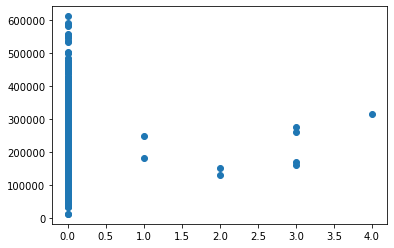

In [81]:
plt.scatter(x=traindice['Pool_QC'], y=traindice['SalePrice'])

Pool Quality done, can proceed to Garage condition now

In [82]:
traindice['Garage_Cond'].value_counts()

TA    1868
Fa      47
Gd      12
Po       8
Ex       2
Name: Garage_Cond, dtype: int64

In [83]:
traindice['Garage_Qual'].value_counts()

TA    1832
Fa      82
Gd      18
Ex       3
Po       2
Name: Garage_Qual, dtype: int64

In [84]:
vcgarage = traindice['Garage_Qual'].value_counts()

In [85]:
def gar_convert(x):
    if x == 'Ex':
        return 5
    elif x == 'Gd':
        return 4
    elif x == 'TA':
        return 3
    elif x == 'Fa':
        return 2
    elif x == 'Po':
        return 1
    elif x not in vcgarage:
        return 0

In [86]:
traindice['Garage_Cond'] = traindice['Garage_Cond'].map(gar_convert)

In [87]:
traindice['Garage_Cond'].value_counts()

3    1868
0     114
2      47
4      12
1       8
5       2
Name: Garage_Cond, dtype: int64

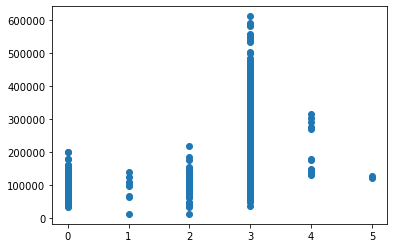

In [88]:
plt.scatter(x=traindice['Garage_Cond'], y=traindice['SalePrice'])

Heavily slanted towards the middle value which is 3, will make into dummy columns to investigate further.
## TURN GARAGE COND 3(TA) INTO DUMMY COLUMN


In [89]:
traindice['Garage_Qual'] = traindice['Garage_Qual'].map(gar_convert)

In [90]:
traindice['Garage_Qual'].value_counts()

3    1832
0     114
2      82
4      18
5       3
1       2
Name: Garage_Qual, dtype: int64

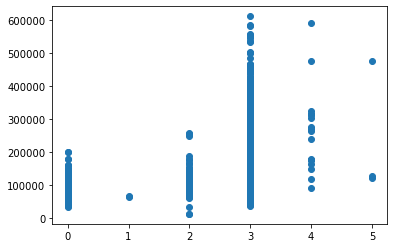

In [91]:
plt.scatter(x=traindice['Garage_Qual'], y=traindice['SalePrice'])

## TURN GARAGE_QUAL 3(TA) INTO DUMMY COLUMN

Finished with Garage Quality and Garage Condition columns, onto Garage Finish

In [92]:
traindice['Garage_Finish'].value_counts()

Unf    849
RFn    579
Fin    509
Name: Garage_Finish, dtype: int64

In [93]:
gfvc = traindice['Garage_Finish'].value_counts()

In [94]:
def garfield(x):
    if x == 'Fin':
        return 3
    elif x == 'RFn':
        return 2
    elif x == 'Unf':
        return 1
    elif x not in gfvc:
        return 0

In [95]:
traindice['Garage_Finish'] = traindice['Garage_Finish'].map(garfield)

In [96]:
traindice['Garage_Finish'].value_counts()

1    849
2    579
3    509
0    114
Name: Garage_Finish, dtype: int64

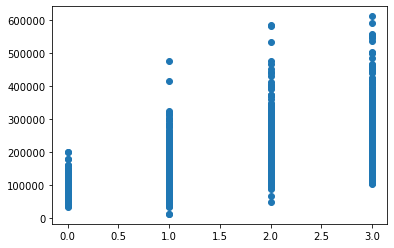

In [97]:
plt.scatter(x=traindice['Garage_Finish'], y=traindice['SalePrice'])

Finished with the Garage Finish column, onto Fireplace Quality

In [98]:
traindice['Fireplace_Qu'].value_counts()

Gd    523
TA    407
Fa     59
Po     31
Ex     31
Name: Fireplace_Qu, dtype: int64

In [99]:
traindice['Fireplace_Qu'] = traindice['Fireplace_Qu'].map(gar_convert)

In [100]:
traindice['Fireplace_Qu'].value_counts()

0    1000
4     523
3     407
2      59
1      31
5      31
Name: Fireplace_Qu, dtype: int64

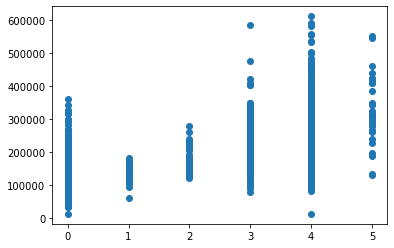

In [101]:
plt.scatter(x=traindice['Fireplace_Qu'], y=traindice['SalePrice'])

#### EXPERIMENT USING DUMMY COLS ON FIREPLACE QU 4 (GD)

Finished with fireplace quality, onto Kitchen Quality

In [102]:
traindice['Kitchen_Qual'].value_counts()

TA    1047
Gd     806
Ex     151
Fa      47
Name: Kitchen_Qual, dtype: int64

In [103]:
traindice['Kitchen_Qual'] = traindice['Kitchen_Qual'].map(pool_convert)

In [104]:
traindice['Kitchen_Qual'].value_counts()

2    1047
3     806
4     151
1      47
Name: Kitchen_Qual, dtype: int64

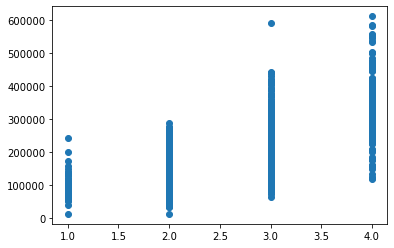

In [105]:
plt.scatter(x=traindice['Kitchen_Qual'], y=traindice['SalePrice'])

Finished with Kitchen Quality, onto central air

In [106]:
traindice['Central_Air'].value_counts()

Y    1910
N     141
Name: Central_Air, dtype: int64

In [107]:
def ca_convert(x):
    if x == 'Y':
        return 1
    if x == 'N':
        return 0

In [108]:
traindice['Central_Air'] = traindice['Central_Air'].map(ca_convert)

In [109]:
traindice['Central_Air'].value_counts()

1    1910
0     141
Name: Central_Air, dtype: int64

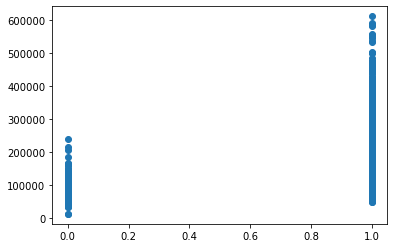

In [110]:
plt.scatter(x=traindice['Central_Air'], y=traindice['SalePrice'])

Finished with Central Air, onto Heating QC

In [111]:
traindice['Heating_QC'].value_counts()

Ex    1065
TA     597
Gd     319
Fa      67
Po       3
Name: Heating_QC, dtype: int64

In [112]:
traindice['Heating_QC'] = traindice['Heating_QC'].map(gar_convert)

In [113]:
traindice['Heating_QC'].value_counts()

5    1065
3     597
4     319
2      67
1       3
Name: Heating_QC, dtype: int64

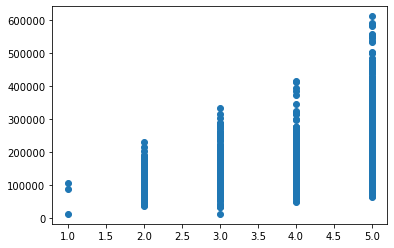

In [114]:
plt.scatter(x=traindice['Heating_QC'], y=traindice['SalePrice'])

Finished with Heating QC, onto the basement columns (Bsmt_Qual, Bsmt_Cond, Bsmt_Exposure)

In [115]:
traindice['Bsmt_Qual'].value_counts()

TA    887
Gd    864
Ex    184
Fa     60
Po      1
Name: Bsmt_Qual, dtype: int64

In [116]:
traindice['Bsmt_Cond'].value_counts()

TA    1834
Gd      89
Fa      65
Po       5
Ex       3
Name: Bsmt_Cond, dtype: int64

In [117]:
traindice['Bsmt_Exposure'].value_counts()

No    1339
Av     288
Gd     203
Mn     163
Name: Bsmt_Exposure, dtype: int64

In [118]:
traindice['Bsmt_Qual'] = traindice['Bsmt_Qual'].map(gar_convert)

In [119]:
traindice['Bsmt_Cond'] = traindice['Bsmt_Cond'].map(gar_convert)

In [120]:
traindice['Bsmt_Qual'].value_counts()

3    887
4    864
5    184
2     60
0     55
1      1
Name: Bsmt_Qual, dtype: int64

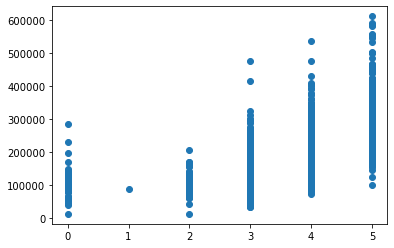

In [121]:
plt.scatter(x=traindice['Bsmt_Qual'], y=traindice['SalePrice'])

In [122]:
traindice['Bsmt_Cond'].value_counts()

3    1834
4      89
2      65
0      55
1       5
5       3
Name: Bsmt_Cond, dtype: int64

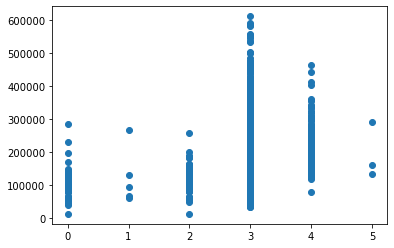

In [123]:
plt.scatter(x=traindice['Bsmt_Cond'], y=traindice['SalePrice'])

## CREATE DUMMY COLUMN FOR BSMT COND 3 (TA)

In [124]:
Exposure_Val = traindice['Bsmt_Exposure'].value_counts()
Exposure_Val

No    1339
Av     288
Gd     203
Mn     163
Name: Bsmt_Exposure, dtype: int64

In [125]:
def Exposure_Convert(x):
    if x == 'Gd':
        return 4
    if x == 'Av':
        return 3
    if x == 'Mn':
        return 2
    if x == 'No':
        return 1
    if x not in Exposure_Val:
        return 0

In [126]:
traindice['Bsmt_Exposure'] = traindice['Bsmt_Exposure'].map(Exposure_Convert)

In [127]:
traindice['Bsmt_Exposure'].value_counts()

1    1339
3     288
4     203
2     163
0      58
Name: Bsmt_Exposure, dtype: int64

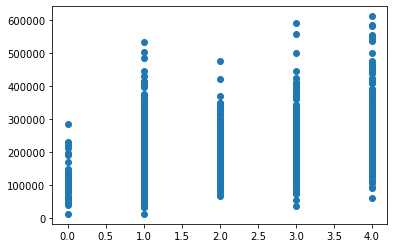

In [128]:
plt.scatter(x=traindice['Bsmt_Exposure'], y=traindice['SalePrice'])

#### BSMT EXPOSURE NOT CORRELATED WITH SALEPRICE SIGNIFICANTLY

Finished with Basement columns, onto Exter Cond and Exter Qual

In [129]:
traindice['Exter_Cond'].value_counts()

TA    1778
Gd     215
Fa      49
Ex       7
Po       2
Name: Exter_Cond, dtype: int64

In [130]:
traindice['Exter_Qual'].value_counts()

TA    1247
Gd     697
Ex      81
Fa      26
Name: Exter_Qual, dtype: int64

In [131]:
traindice['Exter_Cond'] = traindice['Exter_Cond'].map(gar_convert)

In [132]:
traindice['Exter_Cond'].value_counts()

3    1778
4     215
2      49
5       7
1       2
Name: Exter_Cond, dtype: int64

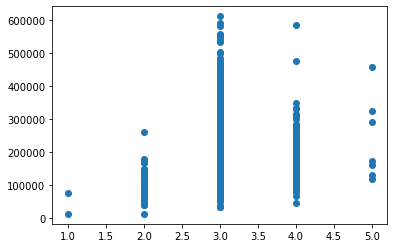

In [133]:
plt.scatter(x=traindice['Exter_Cond'], y=traindice['SalePrice'])

## CREATE DUMMY COLUMN FOR EXTER_COND 3 (TA)

In [134]:
traindice['Exter_Qual'] = traindice['Exter_Qual'].map(gar_convert)

In [135]:
traindice['Exter_Qual'].value_counts()

3    1247
4     697
5      81
2      26
Name: Exter_Qual, dtype: int64

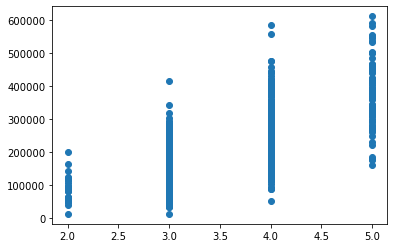

In [136]:
plt.scatter(x=traindice['Exter_Qual'], y=traindice['SalePrice'])

In [137]:
converted_cols = ['Pool_QC', 'Garage_Cond', 'Garage_Qual', 'Garage_Finish', 'Fireplace_Qu', 'Kitchen_Qual',
                  'Central_Air', 'Heating_QC', 'Bsmt_Cond', 'Bsmt_Qual', 'Bsmt_Exposure', 'Exter_Qual', 'Exter_Cond']

In [138]:
train[objcolkeys].isnull().sum()

MS_Zoning            0
Street               0
Alley             1911
Lot_Shape            0
Land_Contour         0
Utilities            0
Lot_Config           0
Land_Slope           0
Neighborhood         0
Condition_1          0
Condition_2          0
Bldg_Type            0
House_Style          0
Roof_Style           0
Roof_Matl            0
Exterior_1st         0
Exterior_2nd         0
Mas_Vnr_Type        22
Exter_Qual           0
Exter_Cond           0
Foundation           0
Bsmt_Qual            0
Bsmt_Cond            0
Bsmt_Exposure        0
BsmtFin_Type_1      55
BsmtFin_Type_2      56
Heating              0
Heating_QC           0
Central_Air          0
Electrical           0
Kitchen_Qual         0
Functional           0
Fireplace_Qu         0
Garage_Type        113
Garage_Finish        0
Garage_Qual          0
Garage_Cond          0
Paved_Drive          0
Pool_QC              0
Fence             1651
Misc_Feature      1986
Sale_Type            0
dtype: int64

In [139]:
traindice_coefficient = traindice.corr()[['SalePrice']].sort_values('SalePrice')
traindice_coefficient

,SalePrice
PID,-0.255052
Enclosed_Porch,-0.135656
Kitchen_AbvGr,-0.125444
Overall_Cond,-0.097019
MS_SubClass,-0.087335
Id,-0.051398
Bsmt_Half_Bath,-0.045290
Low_Qual_Fin_SF,-0.041594
Yr_Sold,-0.015203
Misc_Val,-0.007375


In [140]:
traindice.to_csv('../created_datasets/train_indice_cols_clean.csv')

In [141]:
objtypedice = traindice.dtypes[traindice.dtypes == object]

## LIST OF COLUMNS TO MAKE DUMMIES FOR
- Exter_Cond (3/TA)
- Bsmt_Cond (3/TA)
- Garage_Qual (3/TA)
- Garage_Cond (3/TA)
- Fireplace_Qu (4/GD)

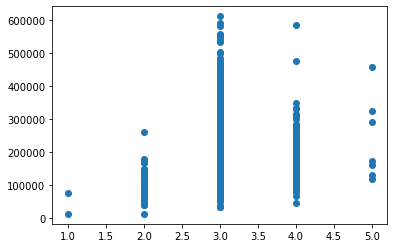

In [142]:
plt.scatter(x=traindice['Exter_Cond'], y=traindice['SalePrice'])

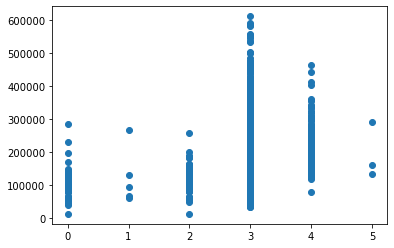

In [143]:
plt.scatter(x=traindice['Bsmt_Cond'], y=traindice['SalePrice'])

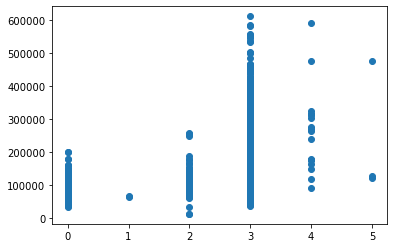

In [144]:
plt.scatter(x=traindice['Garage_Qual'], y=traindice['SalePrice'])

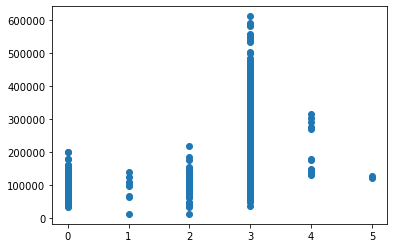

In [145]:
plt.scatter(x=traindice['Garage_Cond'], y=traindice['SalePrice'])

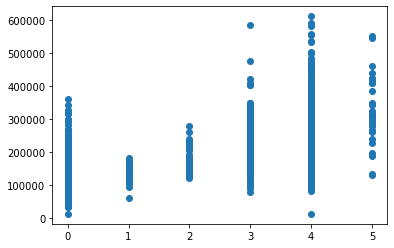

In [146]:
plt.scatter(x=traindice['Fireplace_Qu'], y=traindice['SalePrice'])

In [147]:
traindummy = traindice

In [148]:
traindummy['Fireplace_Is4'] = (traindummy['Fireplace_Qu'] == 4).astype(int)
traindummy['Garage_Cond_Is3'] = (traindummy['Garage_Cond'] == 3).astype(int)
traindummy['Garage_Qual_Is3'] = (traindummy['Garage_Qual'] == 3).astype(int)
traindummy['Bsmt_Cond_Is3'] = (traindummy['Bsmt_Cond'] == 3).astype(int)
traindummy['Exter_Cond_Is3'] = (traindummy['Exter_Cond'] == 3).astype(int)

In [149]:
traindummy.head()

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,SalePrice,Fireplace_Is4,Garage_Cond_Is3,Garage_Qual_Is3,Bsmt_Cond_Is3,Exter_Cond_Is3
0,109,533352170,60,RL,0.0,13517,Pave,NaN,IR1,Lvl,...,0,3,2010,WD,130500,0,1,1,1,1
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,4,2009,WD,220000,0,1,1,1,1
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,1,2010,WD,109000,0,1,1,1,0
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,4,2010,WD,174000,0,1,1,1,1
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,3,2010,WD,138500,0,1,1,0,1


## ETC EDA

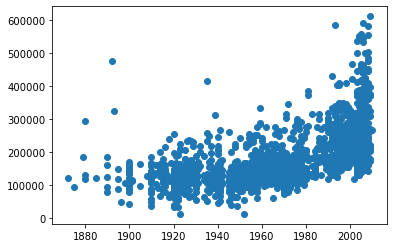

In [150]:
plt.scatter(x=traindice['Year_Built'], y=traindice['SalePrice'])

In [151]:
traindummy['Year_Built_Above_2k'] = (traindummy['Year_Built'] >= 2000).astype(int)

In [152]:
traindummy.head()

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Mo_Sold,Yr_Sold,Sale_Type,SalePrice,Fireplace_Is4,Garage_Cond_Is3,Garage_Qual_Is3,Bsmt_Cond_Is3,Exter_Cond_Is3,Year_Built_Above_2k
0,109,533352170,60,RL,0.0,13517,Pave,NaN,IR1,Lvl,...,3,2010,WD,130500,0,1,1,1,1,0
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,4,2009,WD,220000,0,1,1,1,1,0
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,1,2010,WD,109000,0,1,1,1,0,0
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,4,2010,WD,174000,0,1,1,1,1,1
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,3,2010,WD,138500,0,1,1,0,1,0


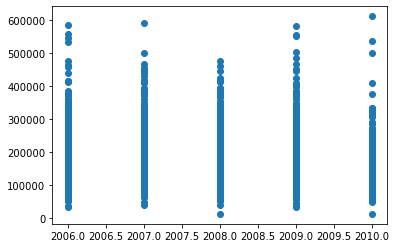

In [153]:
plt.scatter(x=traindice['Yr_Sold'], y=traindice['SalePrice'])

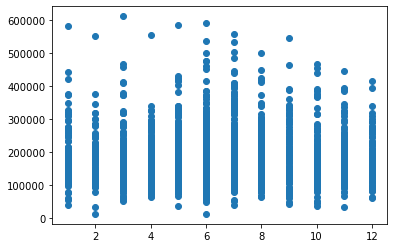

In [154]:
plt.scatter(x=traindice['Mo_Sold'], y=traindice['SalePrice'])

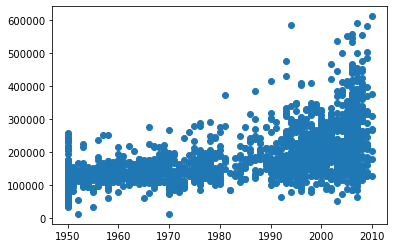

In [155]:
plt.scatter(x=traindice['Year_Remod/Add'], y=traindice['SalePrice'])

In [156]:
traindummy['Year_Remod_Above_2k'] = (traindummy['Year_Remod/Add'] >= 2000).astype(int)
traindummy.head()

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Yr_Sold,Sale_Type,SalePrice,Fireplace_Is4,Garage_Cond_Is3,Garage_Qual_Is3,Bsmt_Cond_Is3,Exter_Cond_Is3,Year_Built_Above_2k,Year_Remod_Above_2k
0,109,533352170,60,RL,0.0,13517,Pave,NaN,IR1,Lvl,...,2010,WD,130500,0,1,1,1,1,0,1
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,2009,WD,220000,0,1,1,1,1,0,0
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,2010,WD,109000,0,1,1,1,0,0,1
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,2010,WD,174000,0,1,1,1,1,1,1
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,2010,WD,138500,0,1,1,0,1,0,0


### CREATING MEAN GRAPHS OF EACH OBJECT TYPE NOT TURNED INTO INTEGERS

In [157]:
objtypedice.keys()

Index(['MS_Zoning', 'Street', 'Alley', 'Lot_Shape', 'Land_Contour',
       'Utilities', 'Lot_Config', 'Land_Slope', 'Neighborhood', 'Condition_1',
       'Condition_2', 'Bldg_Type', 'House_Style', 'Roof_Style', 'Roof_Matl',
       'Exterior_1st', 'Exterior_2nd', 'Mas_Vnr_Type', 'Foundation',
       'BsmtFin_Type_1', 'BsmtFin_Type_2', 'Heating', 'Electrical',
       'Functional', 'Garage_Type', 'Paved_Drive', 'Fence', 'Misc_Feature',
       'Sale_Type'],
      dtype='object')

In [158]:
def object_bar(x):
    plt.bar(sorted(traindice[x].unique()),
            train.groupby(x)['SalePrice'].mean(), color='gold')

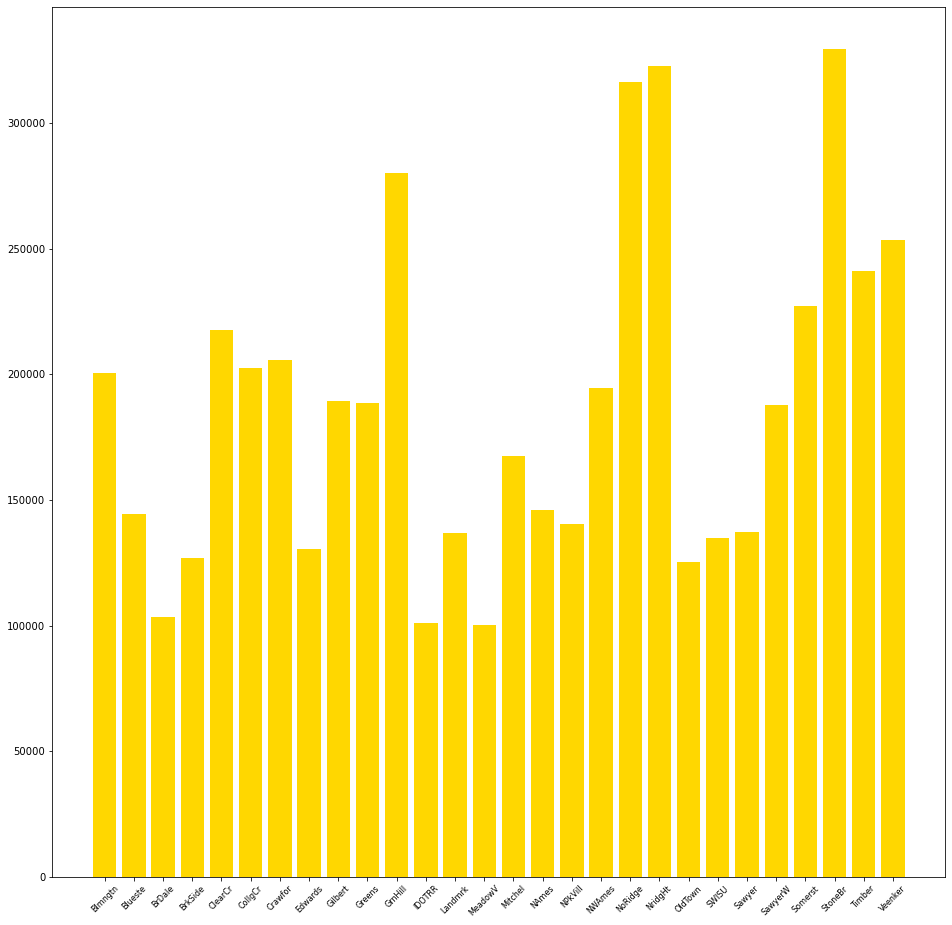

In [159]:
plt.figure(figsize=(16,16))
plt.bar(sorted(train['Neighborhood'].unique()),
              train.groupby('Neighborhood')['SalePrice'].mean(), color ='gold')
plt.xticks(rotation = 45, fontsize = 8);

In [160]:
train['Neighborhood'].value_counts()

NAmes      310
CollgCr    180
OldTown    163
Edwards    143
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
NWAmes      87
SawyerW     87
Mitchel     82
BrkSide     76
Crawfor     71
IDOTRR      69
Timber      48
NoRidge     48
StoneBr     38
SWISU       32
ClearCr     27
MeadowV     24
Blmngtn     22
BrDale      19
Veenker     17
NPkVill     17
Blueste      6
Greens       3
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

In [161]:
nbhd_mean_sorted = traindummy.groupby('Neighborhood')['SalePrice'].mean().sort_values()
nbhd_mean_sorted

Neighborhood
MeadowV    100231.250000
IDOTRR     101103.188406
BrDale     103371.052632
OldTown    125276.300613
BrkSide    127022.697368
Edwards    130493.468531
SWISU      134758.875000
Landmrk    137000.000000
Sawyer     137181.909910
NPkVill    140476.470588
Blueste    144566.666667
NAmes      145905.816129
Mitchel    167656.707317
SawyerW    187760.160920
Greens     188666.666667
Gilbert    189228.387931
NWAmes     194619.022989
Blmngtn    200417.681818
CollgCr    202497.216667
Crawfor    205901.211268
ClearCr    217490.074074
Somerst    227183.900000
Timber     241051.354167
Veenker    253570.588235
GrnHill    280000.000000
NoRidge    316294.125000
NridgHt    322831.352459
StoneBr    329675.736842
Name: SalePrice, dtype: float64

In [162]:
nbhd_quantile = pd.qcut(nbhd_mean_sorted, q=5)
nbhd_quantile

Neighborhood
MeadowV    (100231.249, 132199.631]
IDOTRR     (100231.249, 132199.631]
BrDale     (100231.249, 132199.631]
OldTown    (100231.249, 132199.631]
BrkSide    (100231.249, 132199.631]
Edwards    (100231.249, 132199.631]
SWISU      (132199.631, 145637.986]
Landmrk    (132199.631, 145637.986]
Sawyer     (132199.631, 145637.986]
NPkVill    (132199.631, 145637.986]
Blueste    (132199.631, 145637.986]
NAmes      (145637.986, 195778.755]
Mitchel    (145637.986, 195778.755]
SawyerW    (145637.986, 195778.755]
Greens     (145637.986, 195778.755]
Gilbert    (145637.986, 195778.755]
NWAmes     (145637.986, 195778.755]
Blmngtn    (195778.755, 235504.372]
CollgCr    (195778.755, 235504.372]
Crawfor    (195778.755, 235504.372]
ClearCr    (195778.755, 235504.372]
Somerst    (195778.755, 235504.372]
Timber     (235504.372, 329675.737]
Veenker    (235504.372, 329675.737]
GrnHill    (235504.372, 329675.737]
NoRidge    (235504.372, 329675.737]
NridgHt    (235504.372, 329675.737]
StoneBr    (235

In [163]:
nbhd_quant_dict = {'MeadowV': 'Quantile_1', 'IDOTRR': 'Quantile_1', 'BrDale': 'Quantile_1', 
                   'OldTown': 'Quantile_1', 'BrkSide': 'Quantile_1', 'Edwards': 'Quantile_1',
                  'SWISU': 'Quantile_2', 'Landmrk': 'Quantile_2', 'Sawyer': 'Quantile_2', 'NPkVill': 'Quantile_2',
                  'Blueste': 'Quantile_2', 'NAmes':'Quantile_3', 'Mitchel':'Quantile_3', 'SawyerW':'Quantile_3',
                  'Greens':'Quantile_3', 'Gilbert':'Quantile_3', 'NWAmes':'Quantile_3', 'Blmngtn':'Quantile_4',
                  'CollgCr':'Quantile_4', 'Crawfor':'Quantile_4', 'ClearCr':'Quantile_4', 'Somerst':'Quantile_4',
                  'Timber':'Quantile_5', 'Veenker':'Quantile_5', 'GrnHill':'Quantile_5', 'NoRidge':'Quantile_5',
                  'NridgHt':'Quantile_5', 'StoneBr':'Quantile_5'}

In [164]:
traindummy['Nbhd'] = traindummy['Neighborhood'].map(nbhd_quant_dict)
traindummy.head()

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Sale_Type,SalePrice,Fireplace_Is4,Garage_Cond_Is3,Garage_Qual_Is3,Bsmt_Cond_Is3,Exter_Cond_Is3,Year_Built_Above_2k,Year_Remod_Above_2k,Nbhd
0,109,533352170,60,RL,0.0,13517,Pave,NaN,IR1,Lvl,...,WD,130500,0,1,1,1,1,0,1,Quantile_2
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,WD,220000,0,1,1,1,1,0,0,Quantile_3
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,WD,109000,0,1,1,1,0,0,1,Quantile_3
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,WD,174000,0,1,1,1,1,1,1,Quantile_5
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,WD,138500,0,1,1,0,1,0,0,Quantile_3


In [165]:
traindummy = pd.get_dummies(traindummy, columns = ['Nbhd'])

In [166]:
train['Sale_Type'].value_counts()

WD       1781
New       160
COD        63
ConLD      17
CWD        10
ConLI       7
ConLw       5
Oth         4
Con         4
Name: Sale_Type, dtype: int64

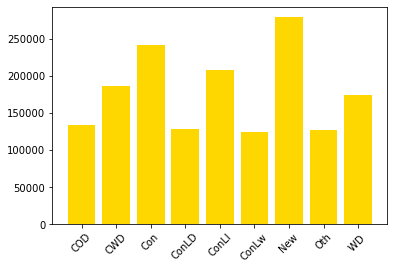

In [245]:
plt.bar(sorted(train['Sale_Type'].unique()),
              train.groupby('Sale_Type')['SalePrice'].mean(), color ='gold')
plt.xticks(rotation = 45)
plt.savefig('../graphs/saletypegraph');

In [168]:
traindummy['Sale_Type_Is_New'] = (traindummy['Sale_Type'] == 'New').astype(int)
traindummy.head()

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Bsmt_Cond_Is3,Exter_Cond_Is3,Year_Built_Above_2k,Year_Remod_Above_2k,Nbhd_Quantile_1,Nbhd_Quantile_2,Nbhd_Quantile_3,Nbhd_Quantile_4,Nbhd_Quantile_5,Sale_Type_Is_New
0,109,533352170,60,RL,0.0,13517,Pave,NaN,IR1,Lvl,...,1,1,0,1,0,1,0,0,0,0
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,1,1,0,0,0,0,1,0,0,0
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,1,0,0,1,0,0,1,0,0,0
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,1,1,1,1,0,0,0,0,1,0
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,1,0,0,0,0,1,0,0,0


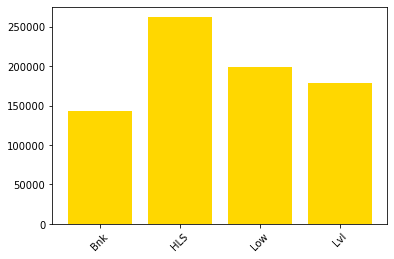

In [169]:
plt.bar(sorted(train['Land_Contour'].unique()),
              train.groupby('Land_Contour')['SalePrice'].mean(), color ='gold')
plt.xticks(rotation = 45);

In [170]:
train['Land_Contour'].value_counts()

Lvl    1843
HLS      85
Bnk      80
Low      43
Name: Land_Contour, dtype: int64

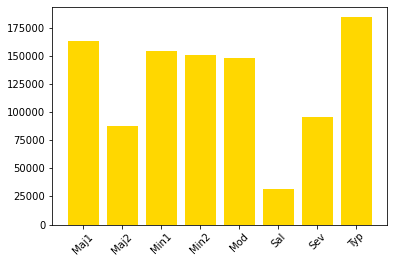

In [171]:
plt.bar(sorted(train['Functional'].unique()),
              train.groupby('Functional')['SalePrice'].mean(), color ='gold')
plt.xticks(rotation = 45);

In [172]:
train['Functional'].value_counts()

Typ     1915
Min1      42
Min2      42
Mod       29
Maj1      12
Maj2       7
Sal        2
Sev        2
Name: Functional, dtype: int64

In [173]:
traindummy['Functional_Is_Bad'] = (traindummy['Functional'].isin(['Maj2', 'Sev', 'Sal'])).astype(int)
traindummy.head()

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Exter_Cond_Is3,Year_Built_Above_2k,Year_Remod_Above_2k,Nbhd_Quantile_1,Nbhd_Quantile_2,Nbhd_Quantile_3,Nbhd_Quantile_4,Nbhd_Quantile_5,Sale_Type_Is_New,Functional_Is_Bad
0,109,533352170,60,RL,0.0,13517,Pave,NaN,IR1,Lvl,...,1,0,1,0,1,0,0,0,0,0
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,1,0,0,0,0,1,0,0,0,0
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,1,0,0,1,0,0,0,0
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,1,1,1,0,0,0,0,1,0,0
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,1,0,0,0,0,1,0,0,0,0


In [174]:
train['Garage_Type'].value_counts()

Attchd     1213
Detchd      536
BuiltIn     132
Basment      27
2Types       19
CarPort      11
Name: Garage_Type, dtype: int64

In [175]:
traindummy['Garage_Type'].replace({'Basment':'Basement'}, inplace = True)

In [176]:
traindummy['Garage_Type'].value_counts()

Attchd      1213
Detchd       536
BuiltIn      132
Basement      27
2Types        19
CarPort       11
Name: Garage_Type, dtype: int64

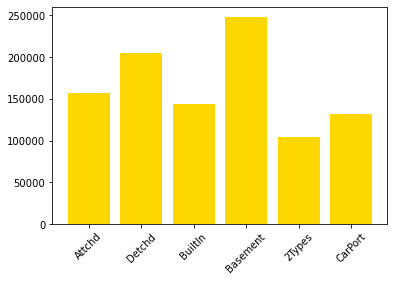

In [177]:
plt.bar((traindummy['Garage_Type'].dropna().unique()), 
        traindummy.groupby('Garage_Type')['SalePrice'].mean(), color ='gold')
plt.xticks(rotation = 45);

In [178]:
train['Garage_Type'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'Basment', nan, '2Types', 'CarPort'],
      dtype=object)

In [179]:
traindummy['Garage_Type_Is_Valued'] = (traindummy['Garage_Type'].isin(['Detchd', 'Basement'])).astype(int)
traindummy.head()

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Year_Built_Above_2k,Year_Remod_Above_2k,Nbhd_Quantile_1,Nbhd_Quantile_2,Nbhd_Quantile_3,Nbhd_Quantile_4,Nbhd_Quantile_5,Sale_Type_Is_New,Functional_Is_Bad,Garage_Type_Is_Valued
0,109,533352170,60,RL,0.0,13517,Pave,NaN,IR1,Lvl,...,0,1,0,1,0,0,0,0,0,0
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,0,0,1,0,0,0,0,0
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,1,0,0,1,0,0,0,0,1
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,1,1,0,0,0,0,1,0,0,0
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,0,0,1,0,0,0,0,1


#### Investigate this error further

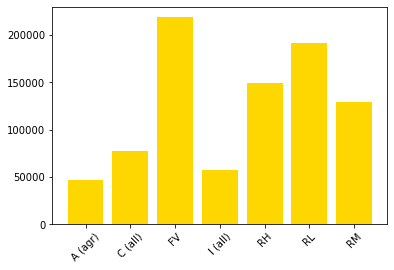

In [180]:
plt.bar(sorted(train['MS_Zoning'].unique()),
              train.groupby('MS_Zoning')['SalePrice'].mean(), color ='gold')
plt.xticks(rotation = 45);

In [181]:
traindummy['MS_Zoning'].value_counts()

RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: MS_Zoning, dtype: int64

In [182]:
traindummy['MS_Zoning_Is_Valued'] = (traindummy['MS_Zoning'].isin(['RL', 'FV'])).astype(int)
traindummy.head()

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Year_Remod_Above_2k,Nbhd_Quantile_1,Nbhd_Quantile_2,Nbhd_Quantile_3,Nbhd_Quantile_4,Nbhd_Quantile_5,Sale_Type_Is_New,Functional_Is_Bad,Garage_Type_Is_Valued,MS_Zoning_Is_Valued
0,109,533352170,60,RL,0.0,13517,Pave,NaN,IR1,Lvl,...,1,0,1,0,0,0,0,0,0,1
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,0,1,0,0,0,0,0,1
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,1,0,0,1,0,0,0,0,1,1
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,1,0,0,0,0,1,0,0,0,1
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,0,1,0,0,0,0,1,1


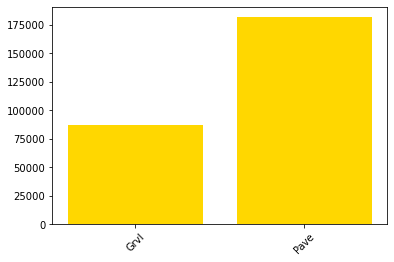

In [183]:
plt.bar(sorted(train['Street'].unique()),
              train.groupby('Street')['SalePrice'].mean(), color ='gold')
plt.xticks(rotation = 45);

In [184]:
traindummy['Street_Is_Paved'] = (traindummy['Street'] == 'Pave').astype(int)
traindummy.head()

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Nbhd_Quantile_1,Nbhd_Quantile_2,Nbhd_Quantile_3,Nbhd_Quantile_4,Nbhd_Quantile_5,Sale_Type_Is_New,Functional_Is_Bad,Garage_Type_Is_Valued,MS_Zoning_Is_Valued,Street_Is_Paved
0,109,533352170,60,RL,0.0,13517,Pave,NaN,IR1,Lvl,...,0,1,0,0,0,0,0,0,1,1
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,1,0,0,0,0,0,1,1
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,1,0,0,0,0,1,1,1
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,0,0,1,0,0,0,1,1
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,1,0,0,0,0,1,1,1


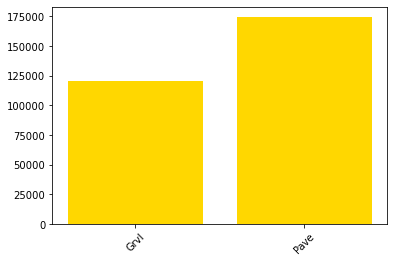

In [185]:
plt.bar(sorted(train['Alley'].dropna().unique()),
              train.groupby('Alley')['SalePrice'].mean(), color ='gold')
plt.xticks(rotation = 45);

In [186]:
traindummy['Alley_Is_Paved'] = (traindummy['Alley'] == 'Pave').astype(int)
traindummy.head()

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Nbhd_Quantile_2,Nbhd_Quantile_3,Nbhd_Quantile_4,Nbhd_Quantile_5,Sale_Type_Is_New,Functional_Is_Bad,Garage_Type_Is_Valued,MS_Zoning_Is_Valued,Street_Is_Paved,Alley_Is_Paved
0,109,533352170,60,RL,0.0,13517,Pave,NaN,IR1,Lvl,...,1,0,0,0,0,0,0,1,1,0
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,1,0,0,0,0,0,1,1,0
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,1,0,0,0,0,1,1,1,0
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,0,1,0,0,0,1,1,0
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,1,0,0,0,0,1,1,1,0


In [187]:
train['Alley'].value_counts()

Grvl    85
Pave    55
Name: Alley, dtype: int64

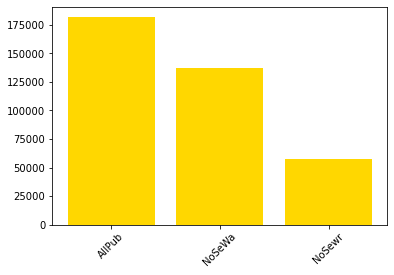

In [188]:
plt.bar(sorted(train['Utilities'].unique()),
              train.groupby('Utilities')['SalePrice'].mean(), color ='gold')
plt.xticks(rotation = 45);

In [189]:
train['Utilities'].value_counts()

AllPub    2049
NoSeWa       1
NoSewr       1
Name: Utilities, dtype: int64

In [190]:
traindummy['Utilities_Is_Bad'] = (traindummy['Utilities'] != 'AllPub').astype(int)
traindummy.head()

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Nbhd_Quantile_3,Nbhd_Quantile_4,Nbhd_Quantile_5,Sale_Type_Is_New,Functional_Is_Bad,Garage_Type_Is_Valued,MS_Zoning_Is_Valued,Street_Is_Paved,Alley_Is_Paved,Utilities_Is_Bad
0,109,533352170,60,RL,0.0,13517,Pave,NaN,IR1,Lvl,...,0,0,0,0,0,0,1,1,0,0
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,1,0,0,0,0,0,1,1,0,0
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,1,0,0,0,0,1,1,1,0,0
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,1,0,0,0,1,1,0,0
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,1,0,0,0,0,1,1,1,0,0


#### Investigate further with Utilities to see whether to make dummy column for AllPub

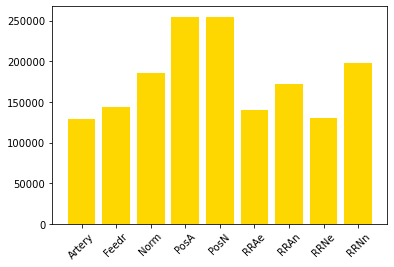

In [191]:
plt.bar(sorted(train['Condition_1'].unique()),
              train.groupby('Condition_1')['SalePrice'].mean(), color ='gold')
plt.xticks(rotation = 45);

In [192]:
train['Condition_1'].value_counts()

Norm      1767
Feedr      109
Artery      70
RRAn        36
PosN        27
RRAe        21
PosA        12
RRNn         6
RRNe         3
Name: Condition_1, dtype: int64

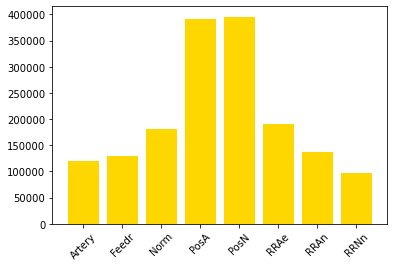

In [193]:
plt.bar(sorted(train['Condition_2'].unique()),
              train.groupby('Condition_2')['SalePrice'].mean(), color ='gold')
plt.xticks(rotation = 45);

In [194]:
train['Condition_2'].value_counts()

Norm      2025
Feedr       11
Artery       5
PosN         3
PosA         3
RRNn         2
RRAn         1
RRAe         1
Name: Condition_2, dtype: int64

In [195]:
traindummy['Condition_2_Is_Pos'] = (traindummy['Condition_2'].isin(['PosA', 'PosN'])).astype(int)
traindummy['Condition_1_Is_Pos'] = (traindummy['Condition_1'].isin(['PosA', 'PosN'])).astype(int)
traindummy['Condition_1_Is_Norm'] = (traindummy['Condition_1'] == 'Norm').astype(int)
traindummy['Condition_2_Is_Norm'] = (traindummy['Condition_1'] == 'Norm').astype(int)

traindummy.head()

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Functional_Is_Bad,Garage_Type_Is_Valued,MS_Zoning_Is_Valued,Street_Is_Paved,Alley_Is_Paved,Utilities_Is_Bad,Condition_2_Is_Pos,Condition_1_Is_Pos,Condition_1_Is_Norm,Condition_2_Is_Norm
0,109,533352170,60,RL,0.0,13517,Pave,NaN,IR1,Lvl,...,0,0,1,1,0,0,0,0,0,0
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,1,1,0,0,0,0,1,1
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,1,1,1,0,0,0,0,1,1
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,1,1,0,0,0,0,1,1
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,1,1,1,0,0,0,0,1,1


## MAKE DUMMY COLUMN FOR PosA AND PosN FOR BOTH CONDITION 1 AND 2

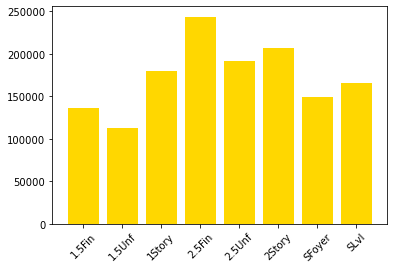

In [196]:
plt.bar(sorted(train['House_Style'].unique()),
              train.groupby('House_Style')['SalePrice'].mean(), color ='gold')
plt.xticks(rotation = 45);

In [197]:
train['House_Style'].value_counts()

1Story    1059
2Story     598
1.5Fin     218
SLvl        94
SFoyer      50
2.5Unf      14
1.5Unf      12
2.5Fin       6
Name: House_Style, dtype: int64

#### Maybe make dummy column for 2story?

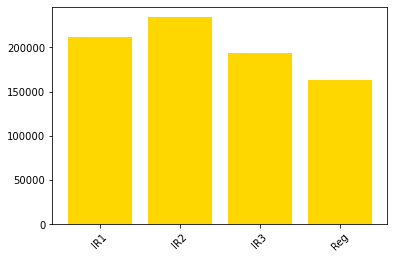

In [198]:
plt.bar(sorted(train['Lot_Shape'].unique()),
              train.groupby('Lot_Shape')['SalePrice'].mean(), color ='gold')
plt.xticks(rotation = 45);

## MAKE COLUMN INDICATING IF IR IN LOTSHAPE OF HOUSE

In [199]:
train['Lot_Shape'].value_counts()

Reg    1295
IR1     692
IR2      55
IR3       9
Name: Lot_Shape, dtype: int64

In [200]:
traindummy['Lot_Shape_Is_IR'] = (traindummy['Lot_Shape'].isin(['IR1', 'IR2', 'IR3'])).astype(int)
traindummy.head()

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Garage_Type_Is_Valued,MS_Zoning_Is_Valued,Street_Is_Paved,Alley_Is_Paved,Utilities_Is_Bad,Condition_2_Is_Pos,Condition_1_Is_Pos,Condition_1_Is_Norm,Condition_2_Is_Norm,Lot_Shape_Is_IR
0,109,533352170,60,RL,0.0,13517,Pave,NaN,IR1,Lvl,...,0,1,1,0,0,0,0,0,0,1
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,1,1,0,0,0,0,1,1,1
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,1,1,1,0,0,0,0,1,1,0
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,1,1,0,0,0,0,1,1,0
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,1,1,1,0,0,0,0,1,1,1


In [201]:
objtypedice.keys()

Index(['MS_Zoning', 'Street', 'Alley', 'Lot_Shape', 'Land_Contour',
       'Utilities', 'Lot_Config', 'Land_Slope', 'Neighborhood', 'Condition_1',
       'Condition_2', 'Bldg_Type', 'House_Style', 'Roof_Style', 'Roof_Matl',
       'Exterior_1st', 'Exterior_2nd', 'Mas_Vnr_Type', 'Foundation',
       'BsmtFin_Type_1', 'BsmtFin_Type_2', 'Heating', 'Electrical',
       'Functional', 'Garage_Type', 'Paved_Drive', 'Fence', 'Misc_Feature',
       'Sale_Type'],
      dtype='object')

### OBJECT COLUMNS DONE
* MS_Zoning
* Street
* Alley
* Lot_Shape
* Land_Contour
* Utilities
* Neighborhood
* Land_Contour
* House Style
* Condition 1
* Condition 2
* Garage Type
* Functional
* Sale Type

### OBJECT COLUMNS LEFT
* Exterior 1st X
* Exterior 2nd X
* Roof Style X
* Foundation X
* Heating X
* BsmtFin_Type_1 X
* BsmtFin_Type_2 X
* Roof Material X
* Fence X
* Paved Drive X
* Misc Feature X
* Mas_Vnr_type X
* Bldg Type X


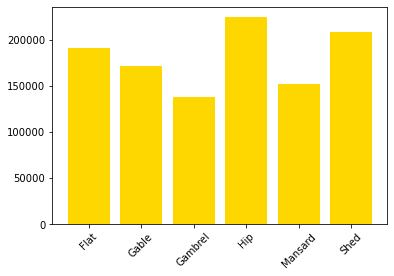

In [202]:
plt.bar(sorted(train['Roof_Style'].unique()),
              train.groupby('Roof_Style')['SalePrice'].mean(), color ='gold')
plt.xticks(rotation = 45);

In [203]:
train['Roof_Style'].value_counts()

Gable      1619
Hip         397
Flat         13
Gambrel      12
Mansard       7
Shed          3
Name: Roof_Style, dtype: int64

In [204]:
traindummy['Roof_Style_Is_Hip'] = (traindummy['Roof_Style'] == 'Hip').astype(int)
traindummy.head()

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,MS_Zoning_Is_Valued,Street_Is_Paved,Alley_Is_Paved,Utilities_Is_Bad,Condition_2_Is_Pos,Condition_1_Is_Pos,Condition_1_Is_Norm,Condition_2_Is_Norm,Lot_Shape_Is_IR,Roof_Style_Is_Hip
0,109,533352170,60,RL,0.0,13517,Pave,NaN,IR1,Lvl,...,1,1,0,0,0,0,0,0,1,0
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,1,1,0,0,0,0,1,1,1,0
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,1,1,0,0,0,0,1,1,0,0
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,1,1,0,0,0,0,1,1,0,0
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,1,1,0,0,0,0,1,1,1,0


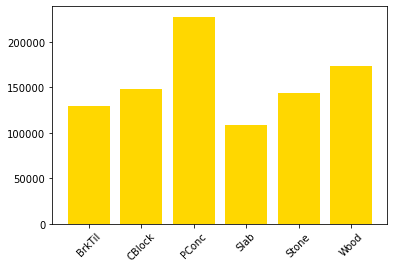

In [205]:
plt.bar(sorted(train['Foundation'].unique()),
              train.groupby('Foundation')['SalePrice'].mean(), color ='gold')
plt.xticks(rotation = 45);

In [206]:
train['Foundation'].value_counts()

PConc     926
CBlock    863
BrkTil    221
Slab       34
Stone       5
Wood        2
Name: Foundation, dtype: int64

In [207]:
traindummy['Foundation_Is_PConc'] = (traindummy['Foundation'] == 'PConc').astype(int)
traindummy.head()

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Street_Is_Paved,Alley_Is_Paved,Utilities_Is_Bad,Condition_2_Is_Pos,Condition_1_Is_Pos,Condition_1_Is_Norm,Condition_2_Is_Norm,Lot_Shape_Is_IR,Roof_Style_Is_Hip,Foundation_Is_PConc
0,109,533352170,60,RL,0.0,13517,Pave,NaN,IR1,Lvl,...,1,0,0,0,0,0,0,1,0,0
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,1,0,0,0,0,1,1,1,0,1
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,1,0,0,0,0,1,1,0,0,0
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,1,0,0,0,0,1,1,0,0,1
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,1,0,0,0,0,1,1,1,0,1


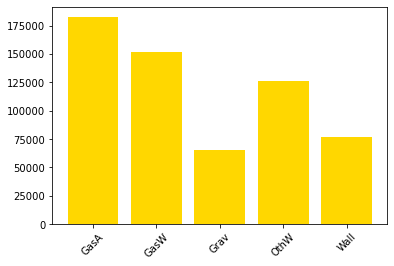

In [208]:
plt.bar(sorted(train['Heating'].unique()),
              train.groupby('Heating')['SalePrice'].mean(), color ='gold')
plt.xticks(rotation = 45);

In [209]:
train['Heating'].value_counts()

GasA    2018
GasW      20
Wall       6
Grav       5
OthW       2
Name: Heating, dtype: int64

In [210]:
traindummy['Heating_Is_Ideal'] = (traindummy['Heating'] == 'GasA').astype(int)
traindummy.head()

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Alley_Is_Paved,Utilities_Is_Bad,Condition_2_Is_Pos,Condition_1_Is_Pos,Condition_1_Is_Norm,Condition_2_Is_Norm,Lot_Shape_Is_IR,Roof_Style_Is_Hip,Foundation_Is_PConc,Heating_Is_Ideal
0,109,533352170,60,RL,0.0,13517,Pave,NaN,IR1,Lvl,...,0,0,0,0,0,0,1,0,0,1
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,0,0,1,1,1,0,1,1
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,0,0,1,1,0,0,0,1
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,0,0,1,1,0,0,1,1
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,0,0,1,1,1,0,1,1


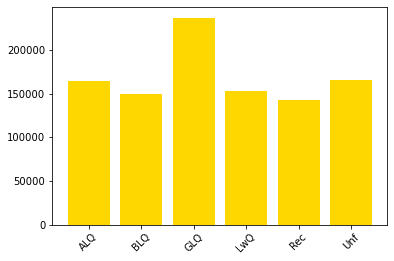

In [211]:
plt.bar(sorted(train['BsmtFin_Type_1'].dropna().unique()),
              train.groupby('BsmtFin_Type_1')['SalePrice'].mean(), color ='gold')
plt.xticks(rotation = 45);

In [212]:
train['BsmtFin_Type_1'].value_counts()

GLQ    615
Unf    603
ALQ    293
BLQ    200
Rec    183
LwQ    102
Name: BsmtFin_Type_1, dtype: int64

In [213]:
traindummy['BsmtFin_Type_1_Is_GLQ'] = (traindummy['BsmtFin_Type_1'] == 'GLQ').astype(int)
traindummy.head()

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Utilities_Is_Bad,Condition_2_Is_Pos,Condition_1_Is_Pos,Condition_1_Is_Norm,Condition_2_Is_Norm,Lot_Shape_Is_IR,Roof_Style_Is_Hip,Foundation_Is_PConc,Heating_Is_Ideal,BsmtFin_Type_1_Is_GLQ
0,109,533352170,60,RL,0.0,13517,Pave,NaN,IR1,Lvl,...,0,0,0,0,0,1,0,0,1,1
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,0,1,1,1,0,1,1,1
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,0,1,1,0,0,0,1,1
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,0,1,1,0,0,1,1,0
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,0,1,1,1,0,1,1,0


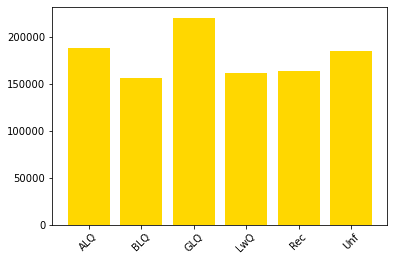

In [214]:
plt.bar(sorted(train['BsmtFin_Type_2'].dropna().unique()),
              train.groupby('BsmtFin_Type_2')['SalePrice'].mean(), color ='gold')
plt.xticks(rotation = 45);

In [215]:
train['BsmtFin_Type_2'].value_counts()

Unf    1749
Rec      80
LwQ      60
BLQ      48
ALQ      35
GLQ      23
Name: BsmtFin_Type_2, dtype: int64

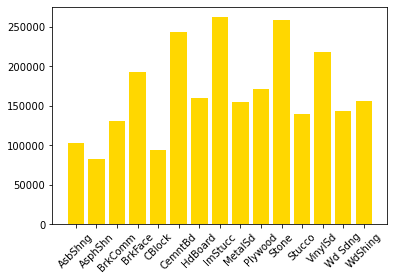

In [216]:
plt.bar(sorted(train['Exterior_1st'].dropna().unique()),
              train.groupby('Exterior_1st')['SalePrice'].mean(), color ='gold')
plt.xticks(rotation = 45);

In [217]:
train['Exterior_1st'].value_counts()

VinylSd    724
MetalSd    331
HdBoard    300
Wd Sdng    276
Plywood    152
CemntBd     90
BrkFace     64
WdShing     45
AsbShng     33
Stucco      27
BrkComm      3
CBlock       2
Stone        2
ImStucc      1
AsphShn      1
Name: Exterior_1st, dtype: int64

In [218]:
traindummy['Exterior_1st_Good'] = (traindummy['Exterior_1st'].isin(['VinylSd', 'Stone', 'ImStucc', 'CemntBd', 'BrkFace'])).astype(int)

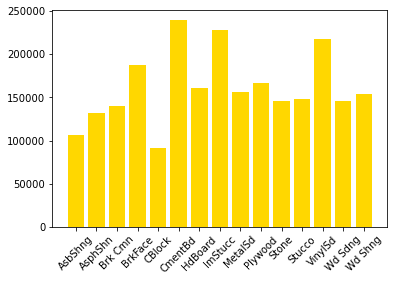

In [219]:
plt.bar(sorted(train['Exterior_2nd'].dropna().unique()),
              train.groupby('Exterior_2nd')['SalePrice'].mean(), color ='gold')
plt.xticks(rotation = 45);

In [220]:
train['Exterior_2nd'].value_counts()

VinylSd    721
MetalSd    324
HdBoard    275
Wd Sdng    262
Plywood    185
CmentBd     90
Wd Shng     63
BrkFace     34
Stucco      30
AsbShng     28
Brk Cmn     17
ImStucc     11
Stone        6
AsphShn      3
CBlock       2
Name: Exterior_2nd, dtype: int64

In [221]:
traindummy['Exterior_2nd_Good'] = (traindummy['Exterior_2nd'].isin(['VinylSD', 'ImStucc', 'CmentBd'])).astype(int)
traindummy.head()

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Condition_1_Is_Pos,Condition_1_Is_Norm,Condition_2_Is_Norm,Lot_Shape_Is_IR,Roof_Style_Is_Hip,Foundation_Is_PConc,Heating_Is_Ideal,BsmtFin_Type_1_Is_GLQ,Exterior_1st_Good,Exterior_2nd_Good
0,109,533352170,60,RL,0.0,13517,Pave,NaN,IR1,Lvl,...,0,0,0,1,0,0,1,1,0,0
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,1,1,1,0,1,1,1,1,0
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,1,1,0,0,0,1,1,1,0
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,1,1,0,0,1,1,0,1,0
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,1,1,1,0,1,1,0,0,0


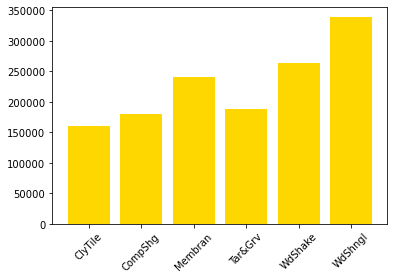

In [222]:
plt.bar(sorted(train['Roof_Matl'].dropna().unique()),
              train.groupby('Roof_Matl')['SalePrice'].mean(), color ='gold')
plt.xticks(rotation = 45);

In [223]:
train['Roof_Matl'].value_counts()

CompShg    2025
Tar&Grv      15
WdShngl       5
WdShake       4
ClyTile       1
Membran       1
Name: Roof_Matl, dtype: int64

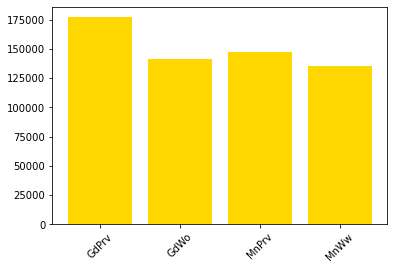

In [224]:
plt.bar(sorted(train['Fence'].dropna().unique()),
              train.groupby('Fence')['SalePrice'].mean(), color ='gold')
plt.xticks(rotation = 45);

In [225]:
train['Fence'].value_counts()

MnPrv    227
GdPrv     83
GdWo      80
MnWw      10
Name: Fence, dtype: int64

In [226]:
traindummy['Fence_Valued'] = (traindummy['Fence'] == 'GdPrv').astype(int)
traindummy.head()

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Condition_1_Is_Norm,Condition_2_Is_Norm,Lot_Shape_Is_IR,Roof_Style_Is_Hip,Foundation_Is_PConc,Heating_Is_Ideal,BsmtFin_Type_1_Is_GLQ,Exterior_1st_Good,Exterior_2nd_Good,Fence_Valued
0,109,533352170,60,RL,0.0,13517,Pave,NaN,IR1,Lvl,...,0,0,1,0,0,1,1,0,0,0
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,1,1,1,0,1,1,1,1,0,0
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,1,1,0,0,0,1,1,1,0,0
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,1,1,0,0,1,1,0,1,0,0
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,1,1,1,0,1,1,0,0,0,0


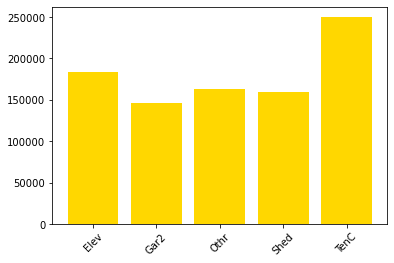

In [227]:
plt.bar(sorted(train['Misc_Feature'].dropna().unique()),
              train.groupby('Misc_Feature')['SalePrice'].mean(), color ='gold')
plt.xticks(rotation = 45);

In [228]:
train['Misc_Feature'].value_counts()

Shed    56
Gar2     4
Othr     3
Elev     1
TenC     1
Name: Misc_Feature, dtype: int64

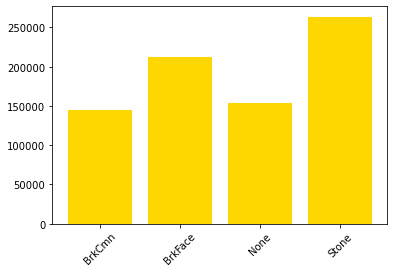

In [229]:
plt.bar(sorted(train['Mas_Vnr_Type'].dropna().unique()),
              train.groupby('Mas_Vnr_Type')['SalePrice'].mean(), color ='gold')
plt.xticks(rotation = 45);

In [230]:
train['Mas_Vnr_Type'].value_counts()

None       1218
BrkFace     630
Stone       168
BrkCmn       13
Name: Mas_Vnr_Type, dtype: int64

In [231]:
traindummy['Mas_Vnr_Type_Good'] = (traindummy['Mas_Vnr_Type'].isin(['BrkFace', 'Stone'])).astype(int)
traindummy.head()

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Condition_2_Is_Norm,Lot_Shape_Is_IR,Roof_Style_Is_Hip,Foundation_Is_PConc,Heating_Is_Ideal,BsmtFin_Type_1_Is_GLQ,Exterior_1st_Good,Exterior_2nd_Good,Fence_Valued,Mas_Vnr_Type_Good
0,109,533352170,60,RL,0.0,13517,Pave,NaN,IR1,Lvl,...,0,1,0,0,1,1,0,0,0,1
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,1,1,0,1,1,1,1,0,0,1
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,1,0,0,0,1,1,1,0,0,0
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,1,0,0,1,1,0,1,0,0,0
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,1,1,0,1,1,0,0,0,0,0


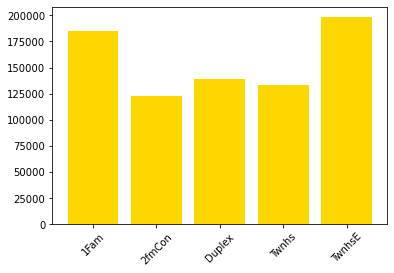

In [232]:
plt.bar(sorted(train['Bldg_Type'].dropna().unique()),
              train.groupby('Bldg_Type')['SalePrice'].mean(), color ='gold')
plt.xticks(rotation = 45);

In [233]:
train['Bldg_Type'].value_counts()

1Fam      1700
TwnhsE     161
Duplex      75
Twnhs       69
2fmCon      46
Name: Bldg_Type, dtype: int64

In [234]:
traindummy['Bldg_Type_Good'] = (traindummy['Bldg_Type'].isin(['1Fam', 'TwnhsE'])).astype(int)
traindummy.head()

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Lot_Shape_Is_IR,Roof_Style_Is_Hip,Foundation_Is_PConc,Heating_Is_Ideal,BsmtFin_Type_1_Is_GLQ,Exterior_1st_Good,Exterior_2nd_Good,Fence_Valued,Mas_Vnr_Type_Good,Bldg_Type_Good
0,109,533352170,60,RL,0.0,13517,Pave,NaN,IR1,Lvl,...,1,0,0,1,1,0,0,0,1,1
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,1,0,1,1,1,1,0,0,1,1
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,0,1,1,1,0,0,0,1
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,1,1,0,1,0,0,0,1
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,1,0,1,1,0,0,0,0,0,1


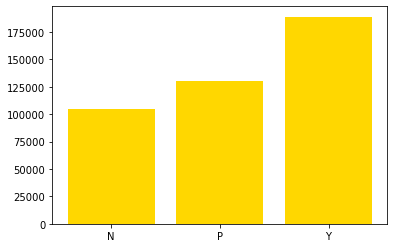

In [235]:
plt.bar(sorted(train['Paved_Drive'].dropna().unique()),
              train.groupby('Paved_Drive')['SalePrice'].mean(), color ='gold');

In [236]:
train['Paved_Drive'].value_counts()

Y    1861
N     151
P      39
Name: Paved_Drive, dtype: int64

In [237]:
traindummy['Paved_Drive_Yes'] = (traindummy['Paved_Drive'] == 'Y').astype(int)
traindummy.head()

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Roof_Style_Is_Hip,Foundation_Is_PConc,Heating_Is_Ideal,BsmtFin_Type_1_Is_GLQ,Exterior_1st_Good,Exterior_2nd_Good,Fence_Valued,Mas_Vnr_Type_Good,Bldg_Type_Good,Paved_Drive_Yes
0,109,533352170,60,RL,0.0,13517,Pave,NaN,IR1,Lvl,...,0,0,1,1,0,0,0,1,1,1
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,1,1,1,1,0,0,1,1,1
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,1,1,1,0,0,0,1,1
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,1,1,0,1,0,0,0,1,1
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,1,1,0,0,0,0,0,1,0


# COMPLETED ANALYSIS

In [238]:
traindummy.to_csv('../created_datasets/train_etc_cols_clean.csv')

In [239]:
traindummy.columns = traindummy.columns.str.lower()
traindummy.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour',
       ...
       'roof_style_is_hip', 'foundation_is_pconc', 'heating_is_ideal',
       'bsmtfin_type_1_is_glq', 'exterior_1st_good', 'exterior_2nd_good',
       'fence_valued', 'mas_vnr_type_good', 'bldg_type_good',
       'paved_drive_yes'],
      dtype='object', length=115)

In [241]:
traindummy.to_csv('../created_datasets/train_clean.csv')

# TOTAL CODING CELLS: 239